In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
df= pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.ndim

2

In [6]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df["age"].unique()

array([80.  , 54.  , 28.  , 36.  , 76.  , 20.  , 44.  , 79.  , 42.  ,
       32.  , 53.  , 78.  , 67.  , 15.  , 37.  , 40.  ,  5.  , 69.  ,
       72.  ,  4.  , 30.  , 45.  , 43.  , 50.  , 41.  , 26.  , 34.  ,
       73.  , 77.  , 66.  , 29.  , 60.  , 38.  ,  3.  , 57.  , 74.  ,
       19.  , 46.  , 21.  , 59.  , 27.  , 13.  , 56.  ,  2.  ,  7.  ,
       11.  ,  6.  , 55.  ,  9.  , 62.  , 47.  , 12.  , 68.  , 75.  ,
       22.  , 58.  , 18.  , 24.  , 17.  , 25.  ,  0.08, 33.  , 16.  ,
       61.  , 31.  ,  8.  , 49.  , 39.  , 65.  , 14.  , 70.  ,  0.56,
       48.  , 51.  , 71.  ,  0.88, 64.  , 63.  , 52.  ,  0.16, 10.  ,
       35.  , 23.  ,  0.64,  1.16,  1.64,  0.72,  1.88,  1.32,  0.8 ,
        1.24,  1.  ,  1.8 ,  0.48,  1.56,  1.08,  0.24,  1.4 ,  0.4 ,
        0.32,  1.72,  1.48])

In [9]:
df["hypertension"].unique()

array([0, 1], dtype=int64)

In [10]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
def counts(df):
    features= df.columns
    for f in features:
        print(df[f].value_counts())

In [14]:
counts(df)

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
hypertension
0    92515
1     7485
Name: count, dtype: int64
heart_disease
0    96058
1     3942
Name: count, dtype: int64
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64
HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2    8269
6.1    8048
3.5    7662
4.8    7597
4.5    7585
4.0    7542
5.0    7471
8.8     661
8.2     661
9.0     654
7.5     643
6.8     642
7.0   

In [15]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [16]:
df.select_dtypes("object").columns

Index(['gender', 'smoking_history'], dtype='object')

In [17]:
df.select_dtypes(include=["float", "int"])

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


In [19]:
df["gender"]= df["gender"].apply(lambda x : 1 if x== "Male" else 0)

In [20]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [21]:
map= {"No Info":0, "never": 1, "former":2, "current": 3, "not current":4, "ever": 5}
df["smoking_history"]= df["smoking_history"].map(map)

In [22]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


In [23]:
pd.cross_tab("smoking_tab", "gender")

AttributeError: module 'pandas' has no attribute 'cross_tab'

In [24]:
df.groupby(["gender", "smoking_history"]).agg({"age":"mean"})

age
gender smoking_history           
0      0                35.098256
       1                44.712592
       2                54.990574
       3                43.164231
       4                47.566254
       5                46.973202
1      0                31.629552
       1                42.355026
       2                59.221494
       3                45.139735
       4                47.881093
       5                51.881586

In [33]:
df.groupby(["age", "heart_disease"]).agg({"bmi":"mean"})

bmi
age   heart_disease           
0.08  0              17.195278
0.16  0              15.181864
0.24  0              16.250460
0.32  0              16.735281
0.40  0              17.072121
...                        ...
78.00 1              27.414737
79.00 0              27.578426
      1              28.272700
80.00 0              26.736590
      1              26.982296

[164 rows x 1 columns]

In [28]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


In [31]:
df.groupby("bmi").mean(numeric_only=True)

,gender,age,hypertension,heart_disease,smoking_history,HbA1c_level,blood_glucose_level,diabetes
bmi,,,,,,,,
10.01,0.5,44.00,0.0,0.0,0.0,6.0,120.0,0.0
10.08,1.0,38.00,0.0,0.0,1.0,6.1,130.0,0.0
10.14,1.0,11.00,0.0,0.0,0.0,6.1,160.0,0.0
10.19,1.0,39.00,0.0,0.0,5.0,6.5,85.0,0.0
10.21,0.0,0.48,0.0,0.0,0.0,5.7,126.0,0.0
...,...,...,...,...,...,...,...,...
88.72,0.0,45.00,0.0,0.0,1.0,7.0,300.0,1.0
88.76,1.0,80.00,0.0,0.0,1.0,6.2,140.0,0.0
91.82,1.0,38.00,0.0,0.0,1.0,6.0,160.0,0.0


In [35]:
df.query("bmi>40 and diabetes==1")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59,0,67.0,0,0,1,63.48,8.8,155,1
350,0,52.0,1,0,1,50.30,6.6,155,1
414,0,68.0,0,0,0,40.31,7.5,260,1
502,1,36.0,0,0,4,46.12,6.2,130,1
562,1,43.0,0,0,1,69.37,7.5,130,1
...,...,...,...,...,...,...,...,...,...
99454,1,43.0,0,0,5,47.81,6.2,260,1
99571,1,57.0,1,0,1,41.93,5.7,300,1
99579,1,55.0,0,0,0,57.78,8.2,155,1
99605,0,53.0,1,0,2,58.38,6.6,155,1


isin()
where()
filter()

In [40]:
df[df["age"]].isin("80", "50")

KeyError: "None of [Index([80.0, 54.0, 28.0, 36.0, 76.0, 20.0, 44.0, 79.0, 42.0, 32.0,\n       ...\n       39.0, 22.0, 26.0, 40.0, 36.0, 80.0,  2.0, 66.0, 24.0, 57.0],\n      dtype='float64', length=100000)] are in the [columns]"

In [36]:
df.where(df["age"]==80)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0.0,1.0,1.0,25.19,6.6,140.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
99995,0.0,80.0,0.0,0.0,0.0,27.32,6.2,90.0,0.0
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.filter(like="smoking")

,smoking_history
0,1
1,0
2,1
3,3
4,3
...,...
99995,0
99996,0
99997,2
99998,1


In [38]:
df2= df.copy()

In [39]:
df2

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,3,23.45,5.0,155,0
4,1,76.0,1,1,3,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,1,35.42,4.0,100,0


In [41]:
df2["agetsr"]= df2["age"].astype(str)

In [45]:
type(df2["agetsr"][0])

str

In [48]:
df["age"].hist

<bound method hist_series of 0        80.0
1        54.0
2        28.0
3        36.0
4        76.0
         ... 
99995    80.0
99996     2.0
99997    66.0
99998    24.0
99999    57.0
Name: age, Length: 100000, dtype: float64>

<Axes: >

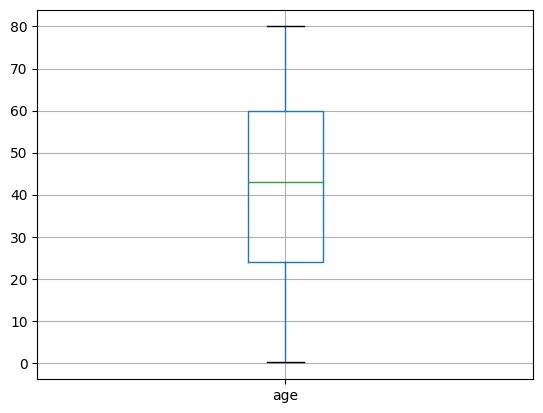

In [49]:
df.boxplot(column="age")

In [50]:
corr_mat= df.corr(numeric_only=True)

In [59]:
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)

<Axes: >

In [62]:
plt.plot()

AttributeError: module 'matplotlib' has no attribute 'plot'